** Definition of convex function:**

A function f( $\vec{x}$ ) is convex on an interval $[a,b]$ if for all $\vec{x}, \vec{y} \in \mathbb{R}^{d}$ and $ 0< \theta < 1$


$$f(\theta \vec{x} + (1-\theta) \vec{y}) \leq \theta f(\vec{x}) + (1-\theta)f(\vec{y})$$



In [2]:
cd('/Users/truong/Desktop/OneDrive/Math579/Homework_6')

In [2]:
tic
[X,lab] = loadFACES( [1:37],'train');
[Z,lab_t] = loadFACES([33],'test');
[Z2] = loadFACES([38],'test');
p=120;
R=randn(p,32256);
R=bsxfun(@rdivide,R,sqrt(sum(R.*R,2)));
D=X';
D=bsxfun(@rdivide,D,sqrt(sum(D.*D,1)));
success=0;
for i=1:32
    z=Z(i,:)';
    alpha=LASSO(R*D,R*z,0.001);
    m=CLASSIFY(R*D,alpha,R*z,lab);
    if m==33
        success=success+1;
    end
end
success
toc

success =
    31
Elapsed time is 132.475448 seconds.

** Run time in Jupyter Notebook = 132.48 seconds **

** Run time in Matlab IDE = 128.52 seconds **

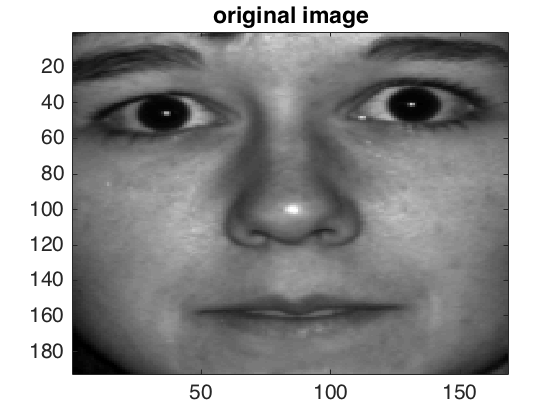

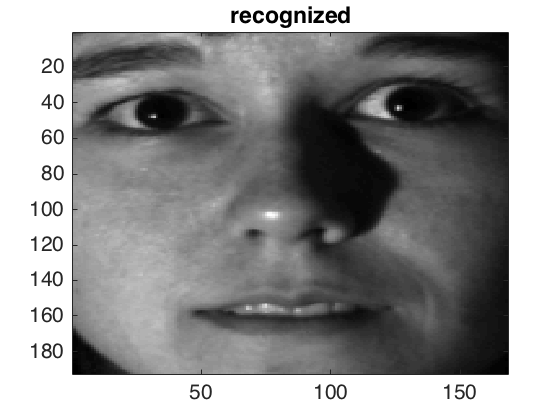

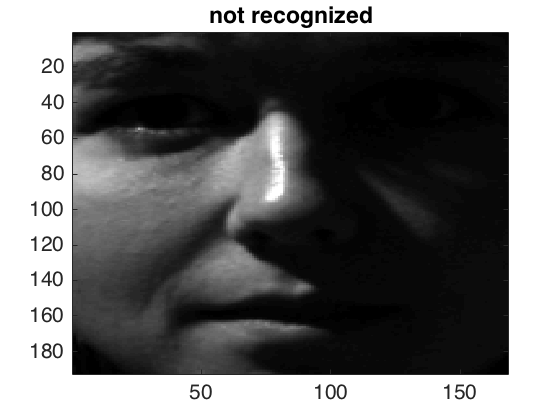

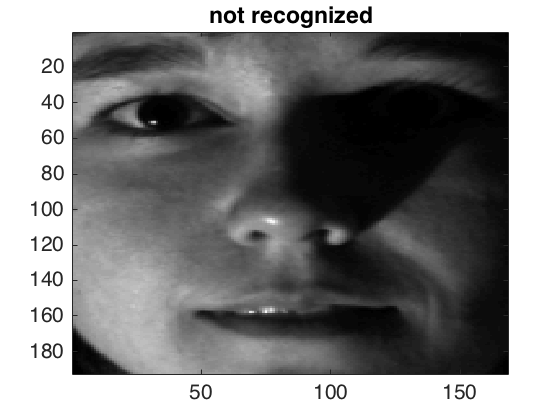

recognized =
    19
Elapsed time is 134.292259 seconds.

In [5]:
tic
clc
clear all
close all
[X,lab] = loadFACES( [1:37],'train');
[Z,lab_t] = loadFACES([33],'test');
[Z2] = loadFACES([38],'test');
p=120;
R=randn(p,32256);
R=bsxfun(@rdivide,R,sqrt(sum(R.*R,2)));
D=X';
D=bsxfun(@rdivide,D,sqrt(sum(D.*D,1)));
% not_recognized=0;
count_recognized=1;%keep track of image #
count_notrecognized=1; 
iter=0;
for i=1:32
    z=Z(i,:)';
    alpha=LASSO(R*D,R*z,0.001);
    m=CONCENTRATION(alpha,lab);
    if m<0.5
        B(count_notrecognized)=i;
        count_notrecognized=count_notrecognized+1;
%         not_recognized=not_recognized+1;
    else
        A(count_recognized)=i;
        count_recognized=count_recognized+1;
    end
 
end
%not recognized face
figure(1)
image=reshape(Z(B(1),:),[192 168]);
imagesc(image)
colormap gray   
title('not recognized')

figure(2)
image=reshape(Z(B(2),:),[192 168]);
imagesc(image)
colormap gray 
title('not recognized')

%recognized face
figure(3)
image=reshape(Z(A(10),:),[192 168]);
imagesc(image)
colormap gray
recognized=length(A)
title('recognized')

%original face
figure(4)
image=reshape(Z(1,:),[192 168]);
imagesc(image)
colormap gray
title('original image')
toc



** Run time in Jupyter Notebook = 134.29 seconds **

** Run time in Matlab = 134.95 seconds **